# 출처
https://dacon.io/competitions/official/235959/codeshare/6472?page=1&dtype=recent

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
!pip install gdrive_dataset
from gdrivedataset import loader
file_id = '15qA4X0jTAhYUyiW-rq81rQGXWCC7_CSB'
loader.load_from_google_drive(file_id)

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
========== files ============

data/sample_submission.csv
data/train.csv
data/test.csv



In [3]:
!unzip -qq '/content/dataset.zip' # 압축파일 경로

In [4]:
train = pd.read_csv('/content/data/train.csv')
train.head(3)

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,ProdTaken
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,3.0,Married,3.0,0,1,0,1.0,Executive,20384.0,0
1,2,34.0,Self Enquiry,3,NaN,Small Business,Female,2,4.0,Deluxe,4.0,Single,1.0,1,5,1,0.0,Manager,19599.0,1
2,3,45.0,Company Invited,1,NaN,Salaried,Male,2,3.0,Deluxe,4.0,Married,2.0,0,4,1,0.0,Manager,NaN,0


In [5]:
test = pd.read_csv('/content/data/test.csv')
test.head(3)

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,PreferredPropertyStar,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome
0,1,32.0,Company Invited,3,NaN,Small Business,Male,2,5.0,Deluxe,3.0,Married,1.0,0,2,0,1.0,Manager,19668.0
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,NaN,Deluxe,4.0,Married,1.0,1,5,0,1.0,Manager,20021.0
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,3.0,Married,5.0,0,5,1,0.0,Manager,21334.0


In [6]:
import os

n_cpu=os.cpu_count()
print("The number of cpus: ",n_cpu)
n_thread=n_cpu*2
print("Expected number of threads:",n_thread)

The number of cpus:  2
Expected number of threads: 4


결측치 info로 발견

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1955 entries, 0 to 1954
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   id                        1955 non-null   int64  
 1   Age                       1861 non-null   float64
 2   TypeofContact             1945 non-null   object 
 3   CityTier                  1955 non-null   int64  
 4   DurationOfPitch           1853 non-null   float64
 5   Occupation                1955 non-null   object 
 6   Gender                    1955 non-null   object 
 7   NumberOfPersonVisiting    1955 non-null   int64  
 8   NumberOfFollowups         1942 non-null   float64
 9   ProductPitched            1955 non-null   object 
 10  PreferredPropertyStar     1945 non-null   float64
 11  MaritalStatus             1955 non-null   object 
 12  NumberOfTrips             1898 non-null   float64
 13  Passport                  1955 non-null   int64  
 14  PitchSat

missingno모듈을 사용해 결측치를 한번에 시각화 했다. 다음에 써먹어야지

```
train_copy = train.copy()
msno.bar(df=train_copy.iloc[:, 1:20], figsize=(13,6))
```
iloc함수로 데이터프레임의 행이나 컬럼에 인덱스 값으로 접근.

1부터 19까지 결측값을 찾아봄.


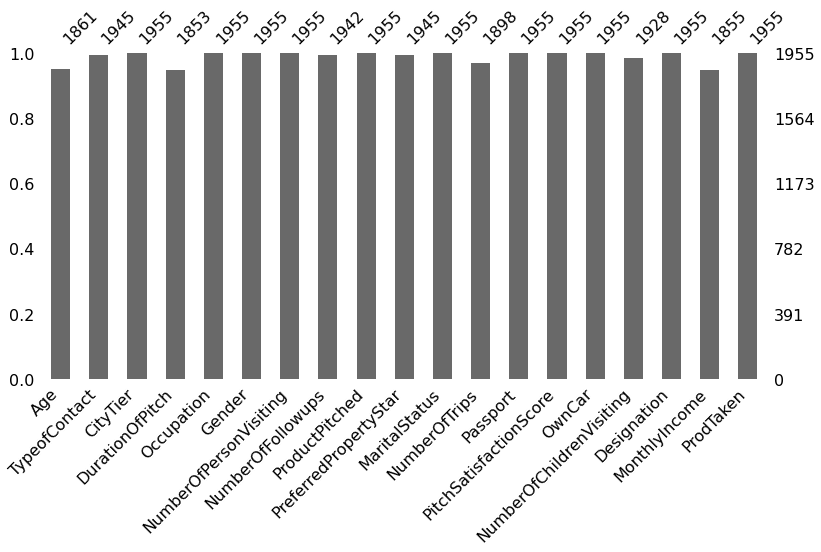

In [8]:
import missingno as msno

train_copy = train.copy()
msno.bar(df=train_copy.iloc[:, 1:20], figsize=(13,6))

따로 함수를 만들어서 데이터에 대한 분석을 한번에 하는 함수를 만들어 사용했다. 



```
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫번째 값'] = df.loc[0].values
  summary['두번째 값'] = df.loc[1].values
  summary['세번째 값'] = df.loc[2].values

  return summary

```
이거 한번 써먹어 보자.


In [9]:
def resumetable(df):
  print(f'데이터셋 형상: {df.shape}')
  summary = pd.DataFrame(df.dtypes, columns=['데이터 타입'])
  summary = summary.reset_index()
  summary = summary.rename(columns={'index':'피처'})
  summary['결측값 개수'] = df.isnull().sum().values
  summary['고윳값 개수'] = df.nunique().values
  summary['첫번째 값'] = df.loc[0].values
  summary['두번째 값'] = df.loc[1].values
  summary['세번째 값'] = df.loc[2].values

  return summary


In [10]:
resumetable(train)

데이터셋 형상: (1955, 20)


,피처,데이터 타입,결측값 개수,고윳값 개수,첫번째 값,두번째 값,세번째 값
0,id,int64,0,1955,1,2,3
1,Age,float64,94,44,28.0,34.0,45.0
2,TypeofContact,object,10,2,Company Invited,Self Enquiry,Company Invited
3,CityTier,int64,0,3,1,3,1
4,DurationOfPitch,float64,102,32,10.0,NaN,NaN
5,Occupation,object,0,4,Small Business,Small Business,Salaried
6,Gender,object,0,3,Male,Female,Male
7,NumberOfPersonVisiting,int64,0,5,3,2,2
8,NumberOfFollowups,float64,13,6,4.0,4.0,3.0
9,ProductPitched,object,0,5,Basic,Deluxe,Deluxe


칼럼별 고유값을 반복문으로 바로 파악했다.

In [11]:
for col in train.columns:
  cols = str(col)
  print(f'{col} 고유값 : {train[cols].unique()} \n')

id 고유값 : [   1    2    3 ... 1953 1954 1955] 

Age 고유값 : [28. 34. 45. 29. 42. 32. 43. 36. 35. 31. 49. nan 52. 33. 22. 50. 23. 41.
 37. 40. 56. 54. 39. 20. 46. 27. 38. 25. 26. 24. 30. 21. 51. 47. 55. 44.
 53. 48. 18. 57. 60. 59. 19. 58. 61.] 

TypeofContact 고유값 : ['Company Invited' 'Self Enquiry' nan] 

CityTier 고유값 : [1 3 2] 

DurationOfPitch 고유값 : [10. nan  7.  6. 29.  8. 20. 14.  9. 16. 15. 23. 21. 11. 25. 34. 17. 13.
 28. 12. 22. 30. 24. 27. 31. 35. 32. 33. 36. 19. 26. 18.  5.] 

Occupation 고유값 : ['Small Business' 'Salaried' 'Large Business' 'Free Lancer'] 

Gender 고유값 : ['Male' 'Female' 'Fe Male'] 

NumberOfPersonVisiting 고유값 : [3 2 4 1 5] 

NumberOfFollowups 고유값 : [ 4.  3.  5.  1.  6.  2. nan] 

ProductPitched 고유값 : ['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe'] 

PreferredPropertyStar 고유값 : [ 3.  4.  5. nan] 

MaritalStatus 고유값 : ['Married' 'Single' 'Divorced' 'Unmarried'] 

NumberOfTrips 고유값 : [ 3.  1.  2.  7.  4.  6.  5.  8. nan 19.] 

Passport 고유값 : [0 1] 

PitchSatisfact

타겟함수에 대한 분석이다.

In [12]:
import matplotlib as mpl

Text(0.5, 1.0, 'Target Distribution')

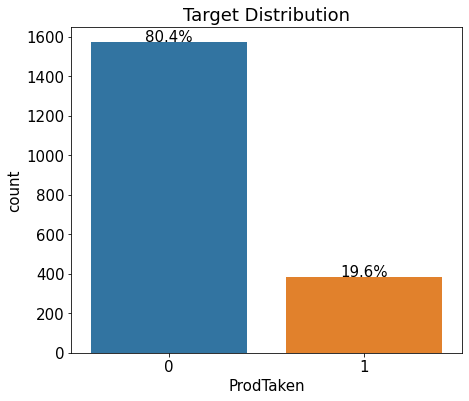

In [13]:
def write_percent(ax, total_size):
  # 도형 객체를 순회하며 막대 그래프 상단에 타깃값 비율 표시
  for patch in ax.patches:
    height = patch.get_height() # 도형 높이(데이터 개수)
    width = patch.get_width() # 도형 너비
    left_coord = patch.get_x()  # 도형 왼쪽 테두리의 x축 위치
    percent = height/total_size*100 # 타깃값 비율

    # (x,y) 좌표에 텍스트 입력
    ax.text(left_coord + width/2.0,
            height + total_size*0.001,
            '{:1.1f}%'.format(percent),
            ha='center')
    
mpl.rc('font', size=15)
plt.figure(figsize=(7,6))

ax = sns.countplot(x='ProdTaken', data=train)
write_percent(ax, len(train))
ax.set_title('Target Distribution')

In [14]:
train.replace({'Gender':'Fe Male'}, 'Female', inplace=True)
# train.replace({'MaritalStatus' : {'Divorced':'Unmarried' , 'Single': 'Unmarried'}}, inplace=True)

In [15]:
test.replace({'Gender':'Fe Male'}, 'Female', inplace=True)
# test.replace({'MaritalStatus' : {'Divorced':'Unmarried' , 'Single': 'Unmarried'}}, inplace=True)

결측치 채우기

In [16]:
# Age는 중간값
train['Age'] = train.loc[:, 'Age'].fillna(train['Age'].median())
test['Age'] = test.loc[:, 'Age'].fillna(test['Age'].median())

In [17]:
# TypeofContact는 최빈값
train['TypeofContact'] = train.loc[:, 'TypeofContact'].fillna('Self Enquiry')
test['TypeofContact'] = test.loc[:, 'TypeofContact'].fillna('Self Enquiry')

In [18]:
#DurationOfPitch는 최빈값
train['DurationOfPitch'] = train.loc[:, 'DurationOfPitch'].fillna(0)
test['DurationOfPitch'] = test.loc[:, 'DurationOfPitch'].fillna(0)

In [19]:
#NumberOfFollowups는 최빈값
train['NumberOfFollowups'] = train.loc[:, 'NumberOfFollowups'].fillna(0)
test['NumberOfFollowups'] = test.loc[:, 'NumberOfFollowups'].fillna(0)

In [20]:
# PreferredPropertyStar는 최빈값
train['PreferredPropertyStar'] = train.loc[:, 'PreferredPropertyStar'].fillna(3.0)
test['PreferredPropertyStar'] = test.loc[:, 'PreferredPropertyStar'].fillna(3.0)

In [21]:
# NumberOfTrips는 최빈값
train['NumberOfTrips'] = train.loc[:, 'NumberOfTrips'].fillna(2.0)
test['NumberOfTrips'] = test.loc[:, 'NumberOfTrips'].fillna(2.0)

In [22]:
#NumberOfChildrenVisiting는 최빈값
train['NumberOfChildrenVisiting'] = train.loc[:, 'NumberOfChildrenVisiting'].fillna(0)
test['NumberOfChildrenVisiting'] = test.loc[:, 'NumberOfChildrenVisiting'].fillna(0)

In [23]:
# MonthlyIncome은 중간값
# MonthlyIncome은 이상치가 존재하므로 평균이 아닌 중간값으로 채워넣겠습니다.
train['MonthlyIncome'] = train.loc[:, 'MonthlyIncome'].fillna(train['MonthlyIncome'].median())
test['MonthlyIncome'] = test.loc[:, 'MonthlyIncome'].fillna(test['MonthlyIncome'].median())

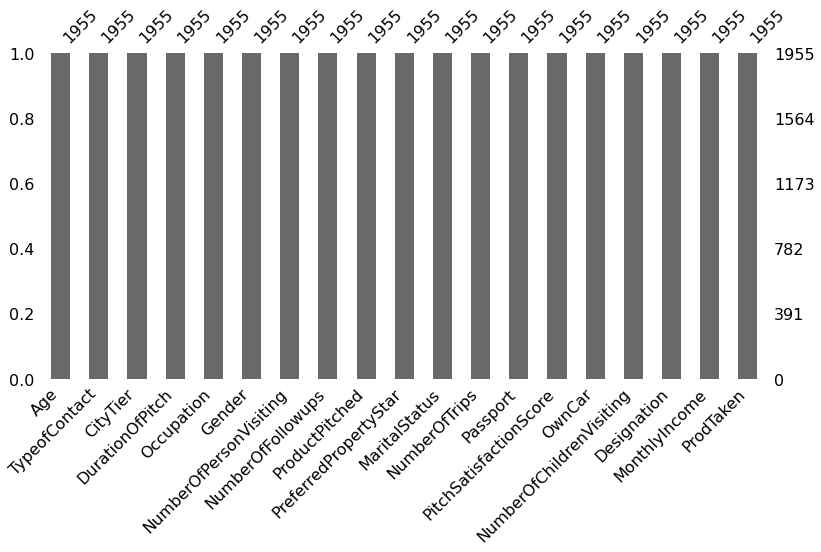

In [24]:
msno.bar(df=train.iloc[:, 1:20], figsize=(13,6))

데이터와 타켓의 분포에 대해 시각화를 진행함.

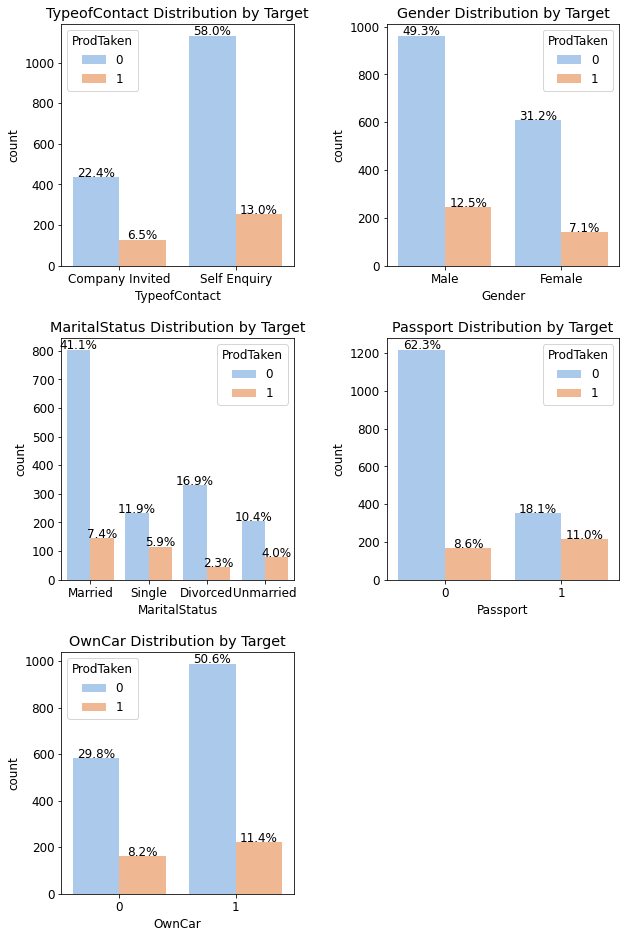

In [25]:
import matplotlib.gridspec as gridspec

# 3행 2열 틀 준비
mpl.rc('font', size=12)
grid = gridspec.GridSpec(3,2)  # 그래프(서브플롯)를 3행 2열로 배치
plt.figure(figsize=(10,16)) # 전체 Figure 크기 설정
plt.subplots_adjust(wspace=0.4, hspace=0.3) # 서브플롯 간 좌우상하 여백설정

# 서브플롯 그리기
bin_features = ['TypeofContact', 'Gender', 'MaritalStatus', 'Passport', 'OwnCar']

for idx, feature in enumerate(bin_features):
  ax = plt.subplot(grid[idx])

  # ax축에 타깃값 분포 카운트 플롯 그리기
  sns.countplot(
      x=feature,
      data=train,
      hue='ProdTaken',
      palette='pastel',
      ax=ax)

  ax.set_title(f'{feature} Distribution by Target' )
  write_percent(ax, len(train))

이진 피처들은 Target값인 ProdTaken처럼 비율들이 대략 8:2인 것을 알 수 있습니다.

In [30]:
# 각 고유값마다 차지하는 Target값의 1이 차지하는 비율 그래프
def plot_target_ratio_by_features(df, features, nrows, ncols, size=(6,12)):

  mpl.rc('font', size=9)
  plt.figure(figsize=size)
#gridspec: 여러 axes를 한번에 배치가능
  grid = gridspec.GridSpec(nrows=nrows, ncols=ncols)
  plt.subplots_adjust(wspace=0.3, hspace=0.3)

  for idx, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    sns.barplot(x=feature, y='ProdTaken', data=df, palette='Set2', ax=ax)

gridspec를 사용한 예제

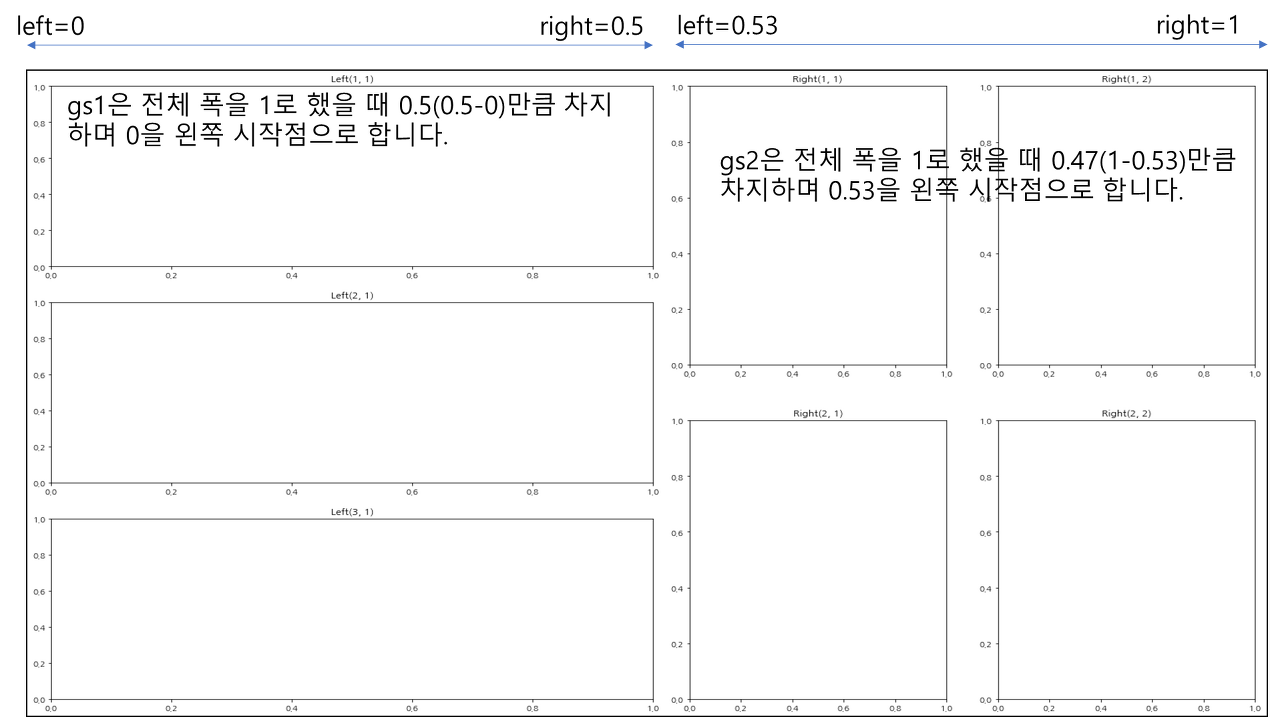

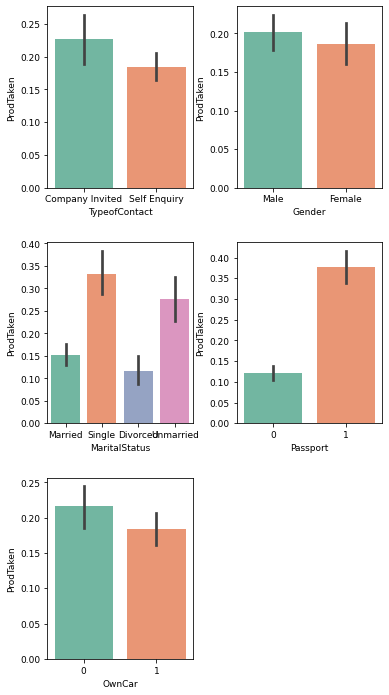

In [31]:
plot_target_ratio_by_features(train, bin_features,3,2)

그래프에서 둘 사이의 비율이 비슷하거나 선의 길이(신뢰구간)의 길이가 긴 경우에 그 변수들을 탈락시킵니다.

그래서 이진형 피처들에서는 값이 비슷한 TypeofContact, Gender, OwnCar를 탈락시키고

상대적으로 차이가 크게 나는 MartialStatus와 Passport 컬럼을 선택합니다.

교차분석으로 순서용 피처를 분석하기

교차분석: 범주형데이터를 비교분석할 때 사용. 

교차분석표: 각 범주형 데이터의 개수를 행과 열로 cross해놓은 표를 의미한다.

[crosstab 설명](https://suy379.tistory.com/149)



```
pd.crosstab(index, columns, values=None, rownames=None, 

colnames=None, aggfunc=None, margins=False, 

margins_name='All', dropna=True, normalize=False)
```



In [60]:

# 교차분석표

def get_crosstab(df, feature):
#normalize = index를 사용했으니까 이건 target으로 설정한 protaken의 비율을 알 수 있다.
#*100을 하는 이유는 퍼센테이지로 보기위해
  crosstab = pd.crosstab(df[feature], df['ProdTaken'], normalize='index') *100
  crosstab = crosstab.reset_index()
  return crosstab

order를 사용하면 x축의 순서를 임의로 변경한다. twinx를 사용하면 축이 헷갈릴 수 있어서 order로 지정해주면 좋다.

In [61]:
def plot_pointplot(ax, feature, crosstab):
# 두 개의 y 축이있는 플롯이 twinx()

  ax2 = ax.twinx()
#pointplot은 막대를 통해 편차와 신뢰구간를 표현합니다.
  ax2 = sns.pointplot(x=feature, y=1, data=crosstab, order=crosstab[feature].values,
                      color='black', legend=False)
  #우리는 1의 비율을 알고 싶기 때문이다. crosstab[1]이 1의 비율을 나타내는 부분을 의미한다.
  ax2.set_ylim(crosstab[1].min()-5, crosstab[1].max()*1.1)
  ax2.set_ylabel('Target 1 Ratio(%)')

[seaborn 그래프 정리](https://coding-grandpa.tistory.com/62?category=954731)

In [64]:
#최종적인 교차분석 함수
def plot_cat_dist_with_true_ratio(df, features, num_rows, num_cols, size=(15,20)):

  plt.figure(figsize=size)
  ##gridspec: 여러 axes를 한번에 배치가능
  grid = gridspec.GridSpec(num_rows, num_cols)
  plt.subplots_adjust(wspace=0.45, hspace=0.3)

  for ids, feature in enumerate(features):
    ax = plt.subplot(grid[idx])
    crosstab = get_crosstab(df, feature)

    sns.countplot(x=feature, data=df, order=crosstab[feature].values, color='skyblue', ax=ax)

    write_percent(ax, len(df))

    plot_pointplot(ax, feature, crosstab)

    ax.set_title(f'{feature} Distribution')

Designation의 순서 맞추기

In [65]:
train['Designation'].value_counts().keys().to_list()

['Executive', 'Manager', 'Senior Manager', 'AVP', 'VP']

In [66]:
ord_1_value = ['Manager','Senior Manager','AVP','VP','Executive']

In [68]:
from pandas.api.types import CategoricalDtype
# CategoricalDtype(categories,ordered)---->  내가 순위를 지정한 대로 순서가 부여된다.
# categories == 내가 순서를 지정한 리스트, ordered == true로 설정시 categories에 전달된 순서를 유지함.
ord_1_dtype = CategoricalDtype(categories=ord_1_value, ordered=True)

train['Designation'] = train['Designation'].astype(ord_1_dtype)

In [69]:
# 순서형 피처
ord_features=['CityTier', 'PreferredPropertyStar', 'PitchSatisfactionScore','Designation']

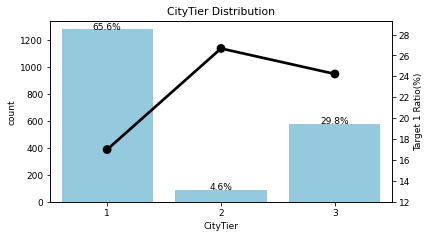

In [70]:
# CityTier
plot_cat_dist_with_true_ratio(train, ['CityTier'], num_rows=3, num_cols=2, size=(15,12))

도시 등급간의 변화를 살펴보면 1티어에서는 총합은 많지만 그 비율이 적고, 2티어에서 비율이 높다고 나오지만 이 경우에는 총합이 적기 때문에 높은 비율이 나온 것으로 보입니다. 그래서 3티어 등급의 도시에서의 비율이 의미가 있다고 보입니다.

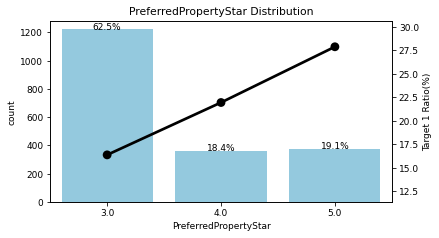

In [71]:
# PreferredPropertyStar
plot_cat_dist_with_true_ratio(train, ['PreferredPropertyStar'], num_rows=3, num_cols=2, size=(15,12))

숙박업소의 등급이 점점 높아질수록 사람들이 여행 가는 비율이 높다고 나옵니다

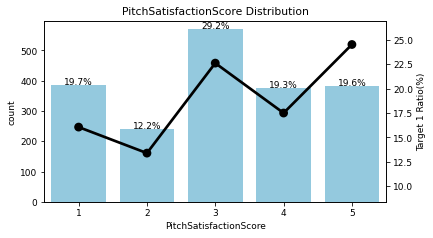

In [72]:
# PitchSatisfactionScore
plot_cat_dist_with_true_ratio(train, ['PitchSatisfactionScore'], num_rows=3, num_cols=2, size=(15,12))

만족도에 따른 분포를 보면 2점과 4점에서 특히 적게 갔다는 것을 알 수 있습니다.

In [79]:
# TypeofContact의 값에 따라 추출
#파생변수를 만들어버림. 여기서는 loc를 사용해서 typeocontact에서 conmpany invited, self로 나눔.
#이러면 TRAIN에 미포함 시킨채로 새로운 뱐수를 만들 수 있다.
train_c = train.loc[train['TypeofContact'] == 'Company Invited']
train_s = train.loc[train['TypeofContact'] == 'Self Enquiry']

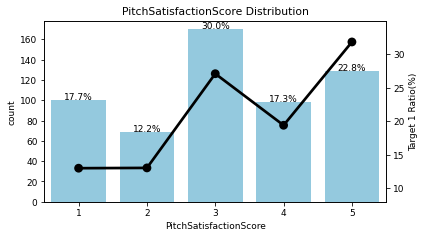

In [76]:
# TypeofContact의 값이 Company Invited인 경우에 PitchSatisfactionScore 분포
plot_cat_dist_with_true_ratio(train_c, ['PitchSatisfactionScore'], num_rows=3, num_cols=2, size=(15,12))

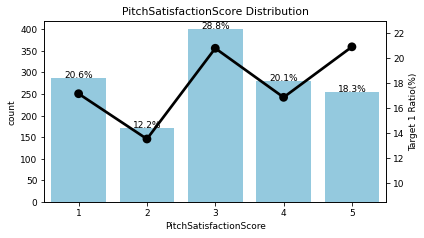

In [77]:
# TypeofContact의 값이 Self Enquiry인 경우에 PitchSatisfactionScore 분포
plot_cat_dist_with_true_ratio(train_s, ['PitchSatisfactionScore'], num_rows=3, num_cols=2, size=(15,12))

고객의 제품 인지 방법에 따른 만족도를 살펴본 결과 2~5점까지는 비슷하지만 1점에서 특히 다른 결과를 보여줬습니다.

특히 스스로 찾아서 온 경우가 회사에서 추천해준 경우보다 더 높은 비율이 나타나는 것으로 보아 이 차이는 스스로의 의지에 따라 달라진다고 생각하였습니다.

그래서 이 만족도와 접근 방법을 이용하여 사람을 크게는 3가지, 작게는 6가지 유형으로 나눴습니다.

첫번째로 4점, 5점은 평범한 사람들보다 우호적인 사람들(Friendly), 2점, 3점은 보통의 사람들(Common) 그리고 1점인 경우에 어떠한 불만족이 생긴 경우로 나누었습니다.

여기서

5점은 우호적인 사람들 중에서 만족한 경우(Friendly Satisfied),

4점은 우호적인 사람들 중에서 어떤 불만족스러운 부분이 생긴 경우(Friendly Unsatisfied),

3점은 보통의 사람들 중에서 만족한 경우(Common Satisfied),

2점은 보통의 사람들 중에서 불만족스러운 부분이 생긴 경우(Common Unsatisfied),

1점에서 회사의 추천을 받은 경우는 불만족스러운 부분이 생겼지만 회사의 추천을 받은 경우라고 생각하여 (Passive Unsatisfied)로,

반대로 불만족스러운 부분이 생겼지만 스스로 가고자 하는 의지가 있는 경우(Active Unsatisfied)로 나누었습니다.

In [80]:
# humantype 함수 생성
def humantype(df):
  df.at[df['PitchSatisfactionScore']==5, 'Humantype'] = 'FS' # Friendly Satisfied
  df.at[df['PitchSatisfactionScore']==4, 'Humantype'] = 'FUS' # Friendly Unsatisfied
  df.at[df['PitchSatisfactionScore']==3, 'Humantype'] = 'CS'  # Common Satisfied
  df.at[df['PitchSatisfactionScore']==2, 'Humantype'] = 'CUS'  # Common Unsatisfied
  df.at[(df['PitchSatisfactionScore']==1) & (df['TypeofContact']== 'Company Invited'), 'Humantype'] = 'PUS'  # Passive Unsatisfied
  df.at[(df['PitchSatisfactionScore']==1) & (df['TypeofContact']== 'Self Enquiry'), 'Humantype'] = 'AUS'  # Active Unsatisfied
  return df

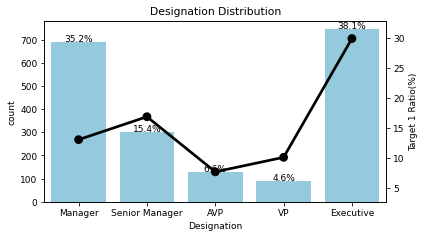

In [81]:
# Designation
plot_cat_dist_with_true_ratio(train, ['Designation'], num_rows=3, num_cols=2, size=(15,12))

2.2.7 순서형 피처에서 컬럼 선택

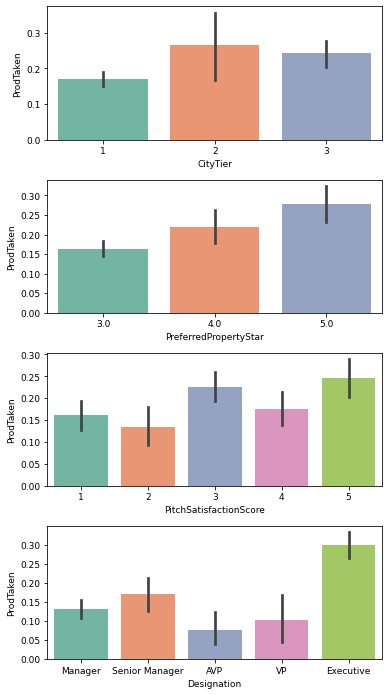

In [83]:
# 막대그래프
#신뢰구간 파악.
plot_target_ratio_by_features(train, ord_features,4,1)

결국 순서형 피처들 중에서는 신뢰구간이 제일 넓은 CityTier를 제외하고 다 사용하겠습니다.

2.3 명목형 피처

In [84]:
nom_features = ['Occupation','ProductPitched','DurationOfPitch','NumberOfPersonVisiting','NumberOfFollowups','NumberOfChildrenVisiting']

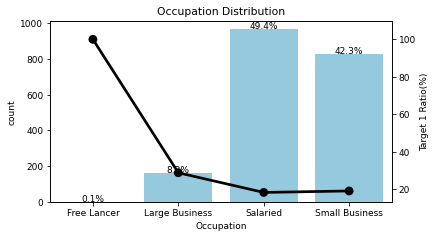

In [92]:
# Occupation
plot_cat_dist_with_true_ratio(train, ['Occupation'], num_rows=3, num_cols=2, size=(15,12))

In [93]:
# 고유값 개수
train['Occupation'].value_counts()

Salaried          965
Small Business    826
Large Business    163
Free Lancer         1
Name: Occupation, dtype: int64

In [94]:
# Free Lancer의 수가 하나이기에 가장 많은 Salaried로 바꿔줍니다
train.replace({'Occupation':'Free Lancer'}, 'Salaried', inplace=True)
test.replace({'Occupation':'Free Lancer'}, 'Salaried', inplace=True)

# daynewB 님의 글을 참고하였습니다.

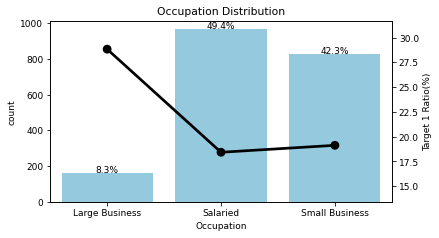

In [95]:
# Occupation
plot_cat_dist_with_true_ratio(train, ['Occupation'], num_rows=3, num_cols=2, size=(15,12))

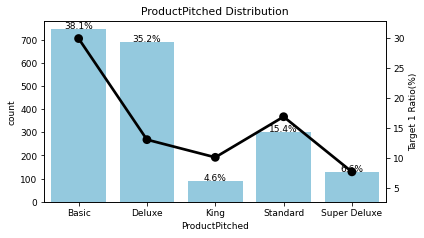

In [96]:
# ProductPitched
plot_cat_dist_with_true_ratio(train, ['ProductPitched'], num_rows=3, num_cols=2, size=(15,12))

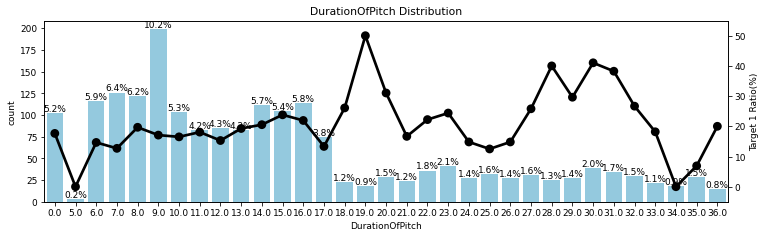

In [97]:
# DurationOfPitch
plot_cat_dist_with_true_ratio(train, ['DurationOfPitch'], num_rows=3, num_cols=2, size=(30,12))

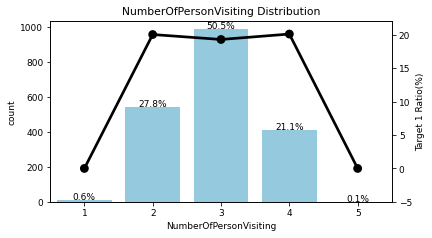

In [98]:
# NumberOfPersonVisiting
plot_cat_dist_with_true_ratio(train, ['NumberOfPersonVisiting'], num_rows=3, num_cols=2, size=(15,12))

In [99]:
# NumberOfPersonVisiting의 고유값 개수
train['NumberOfPersonVisiting'].value_counts()

3    988
2    543
4    412
1     11
5      1
Name: NumberOfPersonVisiting, dtype: int64

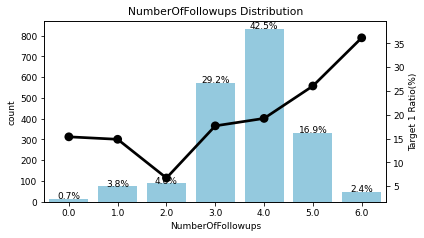

In [100]:
# NumberOfFollowups
plot_cat_dist_with_true_ratio(train, ['NumberOfFollowups'], num_rows=3, num_cols=2, size=(15,12))

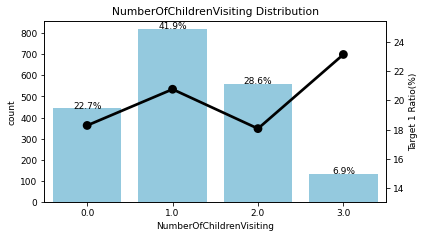

In [101]:
# NumberOfChildrenVisiting
plot_cat_dist_with_true_ratio(train, ['NumberOfChildrenVisiting'], num_rows=3, num_cols=2, size=(15,12))

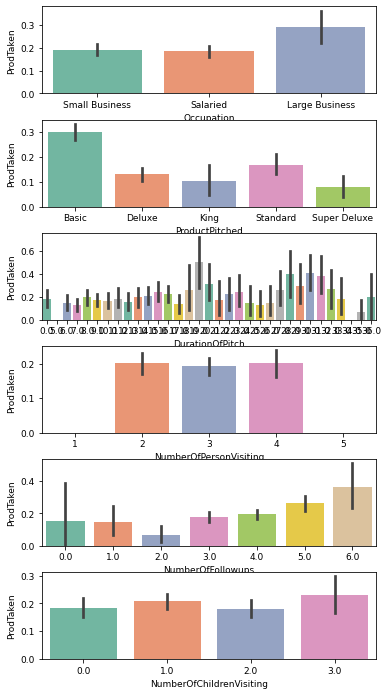

In [102]:
# 컬럼 선택
plot_target_ratio_by_features(train, nom_features,6,1)

명목형 피처들 중에서는 앞서 이진피처에서 설명했던 이유로 Occupation과 ProductPitched만 사용하겠습니다.

2.4 이산형 피처

연속---> 범주로 변경

In [103]:
# 나이대 범주화
def age_category(age):
  age = (age // 10) * 10

  return age

In [104]:
# train에 적용
train['age_category'] = train['Age'].apply(age_category)
train['age_category'].astype('int64')

0       20
1       30
2       40
3       20
4       40
        ..
1950    20
1951    40
1952    30
1953    20
1954    20
Name: age_category, Length: 1955, dtype: int64

In [105]:
# test에 적용
test['age_category'] = test['Age'].apply(age_category)
test['age_category'].astype('int64')

0       30
1       40
2       30
3       40
4       20
        ..
2928    50
2929    30
2930    30
2931    20
2932    30
Name: age_category, Length: 2933, dtype: int64

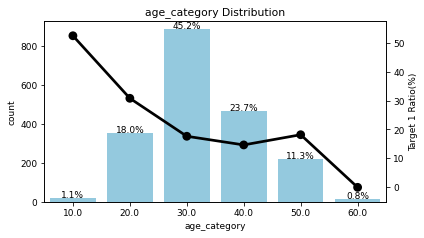

In [106]:
# age_category
plot_cat_dist_with_true_ratio(train, ['age_category'], num_rows=3, num_cols=2, size=(15,12))

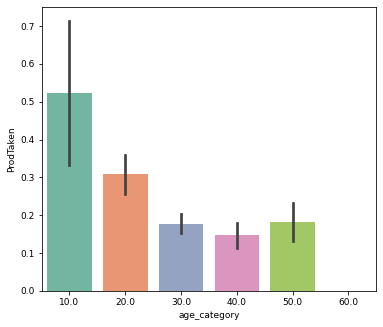

In [107]:
plot_target_ratio_by_features(train, ['age_category'],2,1)

In [111]:
# 실제로 여행가는 사람들만 추출
train_t = train.loc[train['ProdTaken']==1]

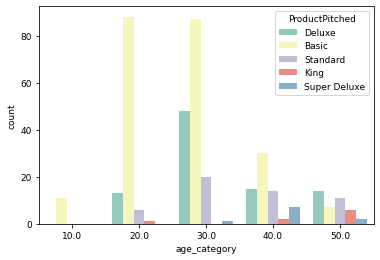

In [112]:
# train_t에서 나이대에 따른 상품의 분포
sns.countplot(x='age_category', data=train_t, hue='ProductPitched', palette='Set3', dodge=True)

Basic 상품은 주로 20대와 30대
Deluxe 상품은 주로 30대
Standard 상품은 주로 30대 40대 50대
King 상품은 주로 40대와 50대
Super Deluxe 상품은 주로 40대와 50대
10대와 60대는 거의 가지 않는다

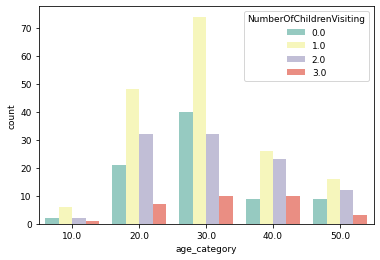

In [113]:
# train_t에서 나이대에 따른 아이들 분포
sns.countplot(x='age_category', data=train_t, hue='NumberOfChildrenVisiting', palette='Set3', dodge=True)

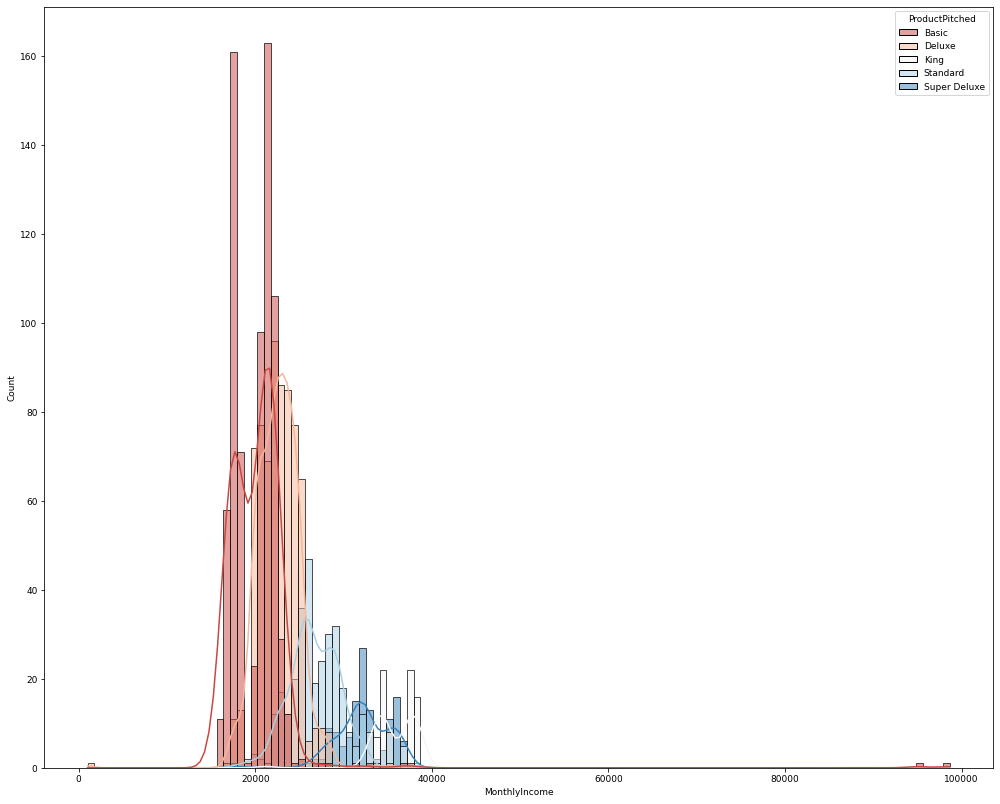

In [114]:
# MonthlyIncome에 따른 상품 분포
plt.figure(figsize=(17,14))
sns.histplot(x='MonthlyIncome', data=train, hue='ProductPitched', palette='RdBu', kde=True)
plt.show()

2.5 사용할 피처 목록

1. MartialStatus
2. Passport
3. PreferredPropertyStar
4. PitchSatisfactionScore
5. Designation
6. Occupation
7. ProductPitched
8. age_category
9. Humantype

지금까지 시각화를 통해 각각의 변수들의 특성을 알아보았고 사용할 변수들을 선택하였습니다.

전처리 과정은 결국 머신러닝에 사용할 피처들을 선택하고 파생변수들을 새로 만드는 과정이라고 생각합니다.

In [115]:
humantype(train)
humantype(test)

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,age_category,Humantype
0,1,32.0,Company Invited,3,0.0,Small Business,Male,2,5.0,Deluxe,...,Married,1.0,0,2,0,1.0,Manager,19668.0,30.0,CUS
1,2,46.0,Self Enquiry,2,11.0,Small Business,Male,3,0.0,Deluxe,...,Married,1.0,1,5,0,1.0,Manager,20021.0,40.0,FS
2,3,37.0,Self Enquiry,3,22.0,Small Business,Male,3,4.0,Deluxe,...,Married,5.0,0,5,1,0.0,Manager,21334.0,30.0,FS
3,4,43.0,Self Enquiry,1,36.0,Small Business,Male,3,6.0,Deluxe,...,Unmarried,6.0,0,3,1,2.0,Manager,22950.0,40.0,CS
4,5,25.0,Self Enquiry,3,7.0,Large Business,Female,4,4.0,Basic,...,Unmarried,3.0,1,4,1,3.0,Executive,21880.0,20.0,FUS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,2929,54.0,Self Enquiry,1,6.0,Small Business,Female,2,3.0,Super Deluxe,...,Single,7.0,0,4,1,1.0,AVP,32328.0,50.0,FUS
2929,2930,33.0,Self Enquiry,1,9.0,Small Business,Female,4,2.0,Deluxe,...,Unmarried,2.0,0,3,0,1.0,Manager,23733.0,30.0,CS
2930,2931,33.0,Company Invited,1,31.0,Salaried,Male,4,4.0,Deluxe,...,Divorced,3.0,0,4,1,1.0,Manager,23987.0,30.0,FUS
2931,2932,26.0,Self Enquiry,1,9.0,Small Business,Male,4,2.0,Basic,...,Unmarried,2.0,0,2,1,3.0,Executive,22102.0,20.0,CUS


데이터 병합

In [116]:
all_data = pd.concat([train, test])
all_data = all_data.drop('ProdTaken', axis=1)
all_data.head()

,id,Age,TypeofContact,CityTier,DurationOfPitch,Occupation,Gender,NumberOfPersonVisiting,NumberOfFollowups,ProductPitched,...,MaritalStatus,NumberOfTrips,Passport,PitchSatisfactionScore,OwnCar,NumberOfChildrenVisiting,Designation,MonthlyIncome,age_category,Humantype
0,1,28.0,Company Invited,1,10.0,Small Business,Male,3,4.0,Basic,...,Married,3.0,0,1,0,1.0,Executive,20384.0,20.0,PUS
1,2,34.0,Self Enquiry,3,0.0,Small Business,Female,2,4.0,Deluxe,...,Single,1.0,1,5,1,0.0,Manager,19599.0,30.0,FS
2,3,45.0,Company Invited,1,0.0,Salaried,Male,2,3.0,Deluxe,...,Married,2.0,0,4,1,0.0,Manager,22295.0,40.0,FUS
3,4,29.0,Company Invited,1,7.0,Small Business,Male,3,5.0,Basic,...,Married,3.0,0,4,0,1.0,Executive,21274.0,20.0,FUS
4,5,42.0,Self Enquiry,3,6.0,Salaried,Male,2,3.0,Deluxe,...,Divorced,2.0,0,3,1,0.0,Manager,19907.0,40.0,CS


In [117]:
# all_data의 컬럼들 확인
all_data.columns

Index(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
       'Occupation', 'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus',
       'NumberOfTrips', 'Passport', 'PitchSatisfactionScore', 'OwnCar',
       'NumberOfChildrenVisiting', 'Designation', 'MonthlyIncome',
       'age_category', 'Humantype'],
      dtype='object')

In [118]:
# 사용하지 않는 피처들 drop
all_data_spr = all_data.drop(['id', 'Age', 'TypeofContact', 'CityTier', 'DurationOfPitch',
        'Gender', 'NumberOfPersonVisiting', 'NumberOfFollowups',
       'NumberOfTrips', 'OwnCar',
       'NumberOfChildrenVisiting', 'MonthlyIncome'], axis=1)
all_data_spr

,Occupation,ProductPitched,PreferredPropertyStar,MaritalStatus,Passport,PitchSatisfactionScore,Designation,age_category,Humantype
0,Small Business,Basic,3.0,Married,0,1,Executive,20.0,PUS
1,Small Business,Deluxe,4.0,Single,1,5,Manager,30.0,FS
2,Salaried,Deluxe,4.0,Married,0,4,Manager,40.0,FUS
3,Small Business,Basic,4.0,Married,0,4,Executive,20.0,FUS
4,Salaried,Deluxe,3.0,Divorced,0,3,Manager,40.0,CS
...,...,...,...,...,...,...,...,...,...
2928,Small Business,Super Deluxe,3.0,Single,0,4,AVP,50.0,FUS
2929,Small Business,Deluxe,3.0,Unmarried,0,3,Manager,30.0,CS
2930,Salaried,Deluxe,3.0,Divorced,0,4,Manager,30.0,FUS
2931,Small Business,Basic,5.0,Unmarried,0,2,Executive,20.0,CUS


In [119]:
# 각 컬럼별 고유값 확인
for col in all_data_spr.columns:
  cols = str(col)
  print(f'{col} 고유값 : {all_data_spr[cols].unique()} \n')

Occupation 고유값 : ['Small Business' 'Salaried' 'Large Business'] 

ProductPitched 고유값 : ['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe'] 

PreferredPropertyStar 고유값 : [3. 4. 5.] 

MaritalStatus 고유값 : ['Married' 'Single' 'Divorced' 'Unmarried'] 

Passport 고유값 : [0 1] 

PitchSatisfactionScore 고유값 : [1 5 4 3 2] 

Designation 고유값 : ['Executive' 'Manager' 'VP' 'Senior Manager' 'AVP'] 

age_category 고유값 : [20. 30. 40. 50. 10. 60.] 

Humantype 고유값 : ['PUS' 'FS' 'FUS' 'CS' 'AUS' 'CUS'] 



In [120]:
# PitchSatisfactionScore drop
all_data_spr = all_data_spr.drop('PitchSatisfactionScore', axis=1)

In [121]:
# # 각 컬럼별 고유값 확인
for col in all_data_spr.columns:
  cols = str(col)
  print(f'{col} 고유값 : {all_data_spr[cols].unique()} \n')

Occupation 고유값 : ['Small Business' 'Salaried' 'Large Business'] 

ProductPitched 고유값 : ['Basic' 'Deluxe' 'King' 'Standard' 'Super Deluxe'] 

PreferredPropertyStar 고유값 : [3. 4. 5.] 

MaritalStatus 고유값 : ['Married' 'Single' 'Divorced' 'Unmarried'] 

Passport 고유값 : [0 1] 

Designation 고유값 : ['Executive' 'Manager' 'VP' 'Senior Manager' 'AVP'] 

age_category 고유값 : [20. 30. 40. 50. 10. 60.] 

Humantype 고유값 : ['PUS' 'FS' 'FUS' 'CS' 'AUS' 'CUS'] 



In [122]:
# One-hot 인코딩 할 명목형 피처들
nom_features1 = ['Occupation', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Designation', 'age_category', 'Humantype']

In [123]:
all_data_spr_encoded = pd.get_dummies(all_data_spr, columns = ['Occupation', 'ProductPitched', 'PreferredPropertyStar', 'MaritalStatus', 'Designation', 'age_category', 'Humantype'])
all_data_spr_encoded

,Passport,Occupation_Large Business,Occupation_Salaried,Occupation_Small Business,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_3.0,...,age_category_30.0,age_category_40.0,age_category_50.0,age_category_60.0,Humantype_AUS,Humantype_CS,Humantype_CUS,Humantype_FS,Humantype_FUS,Humantype_PUS
0,0,0,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,1,0,1,0,0,0,0,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,0,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,0,0,0,1,0,0,0,0,1,1,...,0,0,1,0,0,0,0,0,1,0
2929,0,0,0,1,0,1,0,0,0,1,...,1,0,0,0,0,1,0,0,0,0
2930,0,0,1,0,0,1,0,0,0,1,...,1,0,0,0,0,0,0,0,1,0
2931,0,0,0,1,1,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


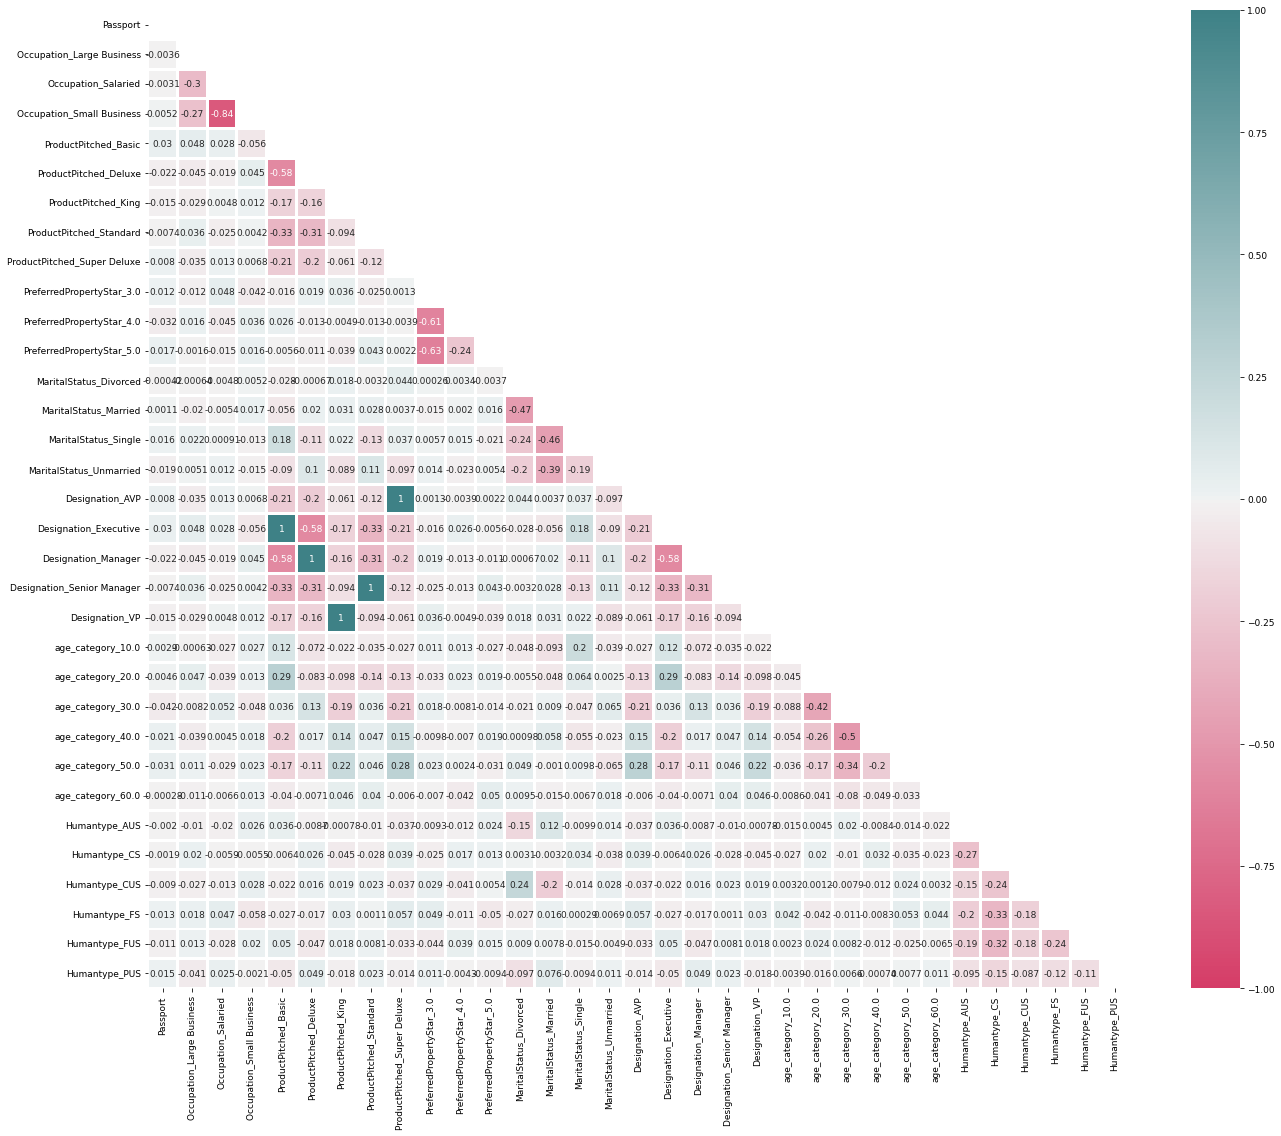

In [124]:
# heatmap을 그리기 위한 파라미터들 설정
mask = np.zeros_like(all_data_spr_encoded.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)]=True #diagonal의 값이 어차피 1이기 때문에 그거랑 대칭이기 때문에 중복되는 값을 제외
f, ax = plt.subplots(figsize=(22,18))
cmap = sns.diverging_palette(1,200, as_cmap=True)#색깔정해주는것

# 저장해둔 all_data_spr_encoded mask, cmap을 활용하여 correlation을 표현하는 heatmap을 그립니다. correlation에 맞게 최대, 최소, 중간값을 지정해줍니다.
# linewidths=2로 설정합니다. 그림 크기는 figsize=(11,9)로 설정합니다.
sns.heatmap(all_data_spr_encoded.corr(), mask=mask, cmap=cmap, vmax=1, vmin=-1, center=0, linewidth=2, annot=True )
#linewidth는 여백
#어느변수가 상관관계가 큰지 한눈에보임

In [127]:
all_data_spr_encoded.drop(['Occupation_Small Business','Designation_AVP', 'Designation_Executive',
       'Designation_Manager', 'Designation_Senior Manager', 'Designation_VP'], axis=1)

,Passport,Occupation_Large Business,Occupation_Salaried,ProductPitched_Basic,ProductPitched_Deluxe,ProductPitched_King,ProductPitched_Standard,ProductPitched_Super Deluxe,PreferredPropertyStar_3.0,PreferredPropertyStar_4.0,...,age_category_30.0,age_category_40.0,age_category_50.0,age_category_60.0,Humantype_AUS,Humantype_CS,Humantype_CUS,Humantype_FS,Humantype_FUS,Humantype_PUS
0,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,1,0,0,0,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
2,0,0,1,0,1,0,0,0,0,1,...,0,1,0,0,0,0,0,0,1,0
3,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
4,0,0,1,0,1,0,0,0,1,0,...,0,1,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2928,0,0,0,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,1,0
2929,0,0,0,0,1,0,0,0,1,0,...,1,0,0,0,0,1,0,0,0,0
2930,0,0,1,0,1,0,0,0,1,0,...,1,0,0,0,0,0,0,0,1,0
2931,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


상관관계를 살펴보니 Designation과 여행상품의 상관계수가 1로 나옵니다.

이 둘은 1대1로 대응되는 컬럼들이니 Designation을 드랍시키겠습니다.

또, 음의 상관계수가 높은 Occupation_Small Business열을 드랍시키겠습니다.